In [1]:
import pandas as pd
import numpy as np
ds = pd.read_csv('worldometer_data.csv')
ds

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [2]:
ds.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [3]:
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline

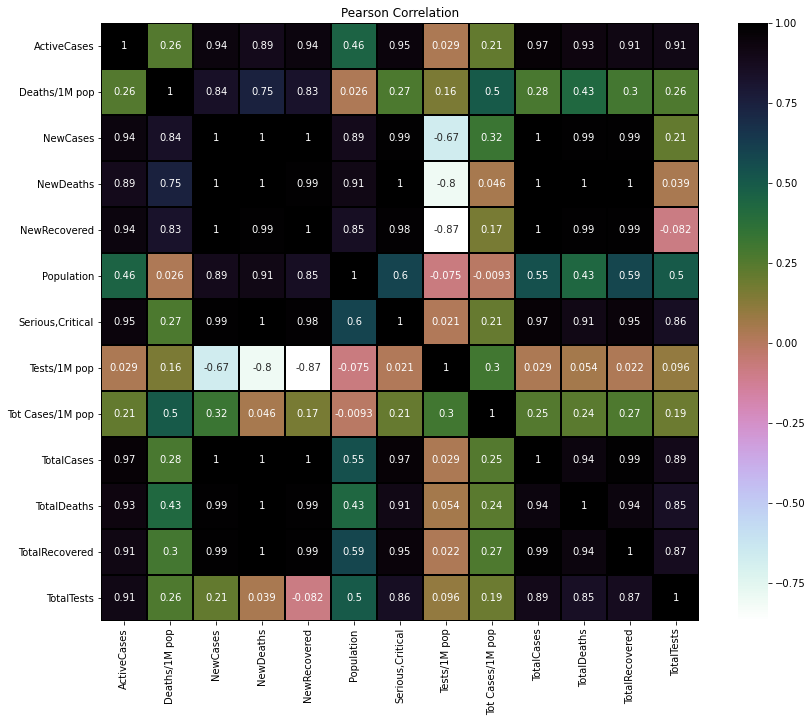

In [4]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in ds.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = ds.columns.difference(str_list) 
# Create Dataframe containing only numerical features
ds_num = ds[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation')
# Draw the heatmap using seaborn
sns.heatmap(ds_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

In [5]:
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
NewRecovered,98.564593
NewDeaths,98.564593
NewCases,98.086124
"Serious,Critical",41.626794
WHO Region,11.961722
Deaths/1M pop,10.526316
TotalDeaths,10.047847
Tests/1M pop,8.612440
TotalTests,8.612440
ActiveCases,1.913876


In [6]:
print(pd.value_counts(ds["Continent"]))

Africa               57
Asia                 48
Europe               48
North America        35
South America        14
Australia/Oceania     6
Name: Continent, dtype: int64


In [7]:
ds.drop('NewRecovered', axis=1, inplace=True)

In [8]:
ds

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [10]:
ds.drop('NewCases', axis=1, inplace=True)

In [11]:
ds

,Country/Region,Continent,Population,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,NaN,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,NaN,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,NaN,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,NaN,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,NaN,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0,NaN,10.0,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,7.0,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,13.0,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,12.0,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [12]:
ds.drop('NewDeaths', axis=1, inplace=True)

In [13]:
ds

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0,10.0,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,7.0,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,13.0,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,12.0,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [14]:
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
"Serious,Critical",41.626794
WHO Region,11.961722
Deaths/1M pop,10.526316
TotalDeaths,10.047847
Tests/1M pop,8.612440
TotalTests,8.612440
ActiveCases,1.913876
TotalRecovered,1.913876
Tot Cases/1M pop,0.478469
Population,0.478469


In [15]:
ds['Continent'] = ds['Continent'].fillna(ds['Continent'].mode()[0])

In [16]:
ds['Country/Region'] = ds['Country/Region'].fillna(ds['Country/Region'].mode()[0])

In [17]:
ds['WHO Region'] = ds['WHO Region'].fillna(ds['WHO Region'].mode()[0])

In [18]:
ds['TotalDeaths'] = ds['TotalDeaths'].fillna(ds['TotalDeaths'].mode()[0])

In [19]:
ds['TotalRecovered'] = ds['TotalRecovered'].fillna(ds['TotalRecovered'].mode()[0])

In [20]:
ds['TotalTests'] = ds['TotalTests'].fillna(ds['TotalTests'].mode()[0])

In [21]:
ds['ActiveCases'] = ds['ActiveCases'].fillna(ds['ActiveCases'].mode()[0])

In [22]:
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
"Serious,Critical",41.626794
Deaths/1M pop,10.526316
Tests/1M pop,8.612440
Tot Cases/1M pop,0.478469
Population,0.478469


In [23]:
ds['Population'] = ds['Population'].fillna(ds['Population'].mode()[0])

In [24]:
ds = ds.drop('Serious,Critical', axis=1)

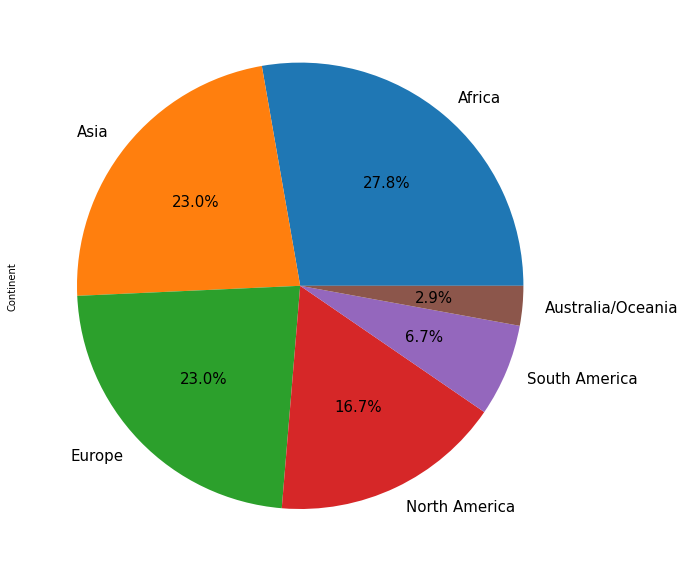

In [26]:
ds["Continent"].value_counts().plot.pie(figsize=(10,15), fontsize = 15, autopct='%1.1f%%')

In [28]:
ds_con = ds.groupby("Continent").sum()
ds_con.head()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Continent,,,,,,,,,
Africa,1.343516e+09,1012579,22129.0,694271.0,296181.0,64456.0,1003.28,8694853.0,806042.0
Asia,3.173656e+09,4689794,100633.0,3508170.0,1080997.0,192429.0,1846.80,65356821.0,3433453.0
Australia/Oceania,4.095791e+07,21735,283.0,12620.0,8834.0,1446.0,15.30,5152811.0,347083.0
Europe,7.476775e+08,2982576,205235.0,1587374.0,475261.0,209454.0,9673.00,96127111.0,8286140.0
North America,5.895035e+08,5919209,229862.0,3151678.0,2537676.0,88547.0,3097.00,70175084.0,2069875.0


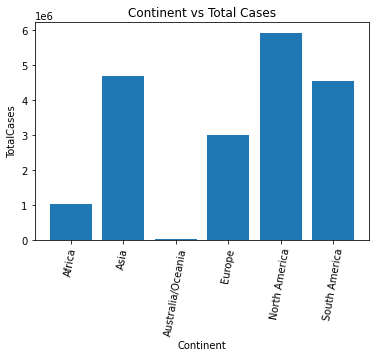

In [31]:
plt.bar(ds_con.index, "TotalCases", data = ds_con)
plt.xlabel("Continent")
plt.ylabel("TotalCases")
plt.title("Continent vs Total Cases")
plt.xticks(rotation = 80)
plt.show()

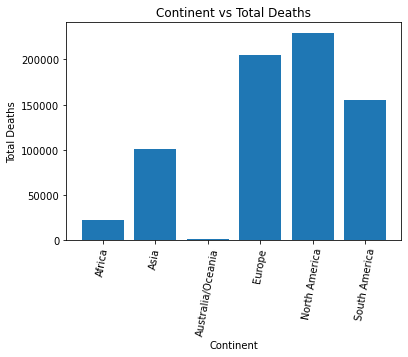

In [32]:
plt.bar(ds_con.index, "TotalDeaths", data = ds_con)
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.title("Continent vs Total Deaths")
plt.xticks(rotation = 80)
plt.show()

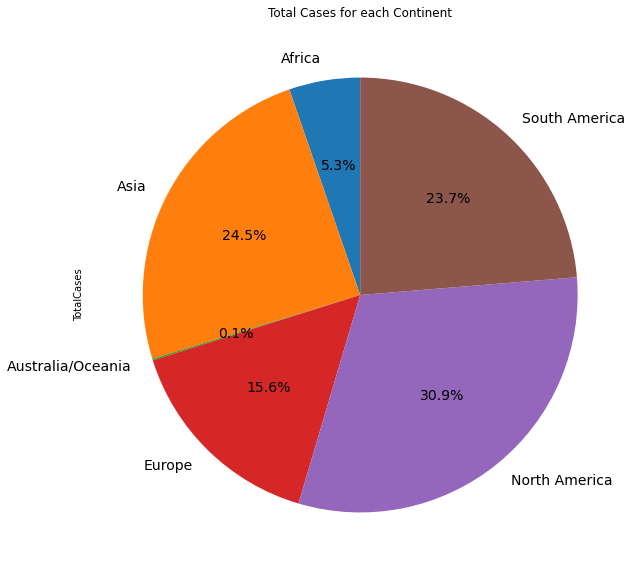

In [33]:
gb_df =  ds[["Continent","TotalCases"]]
gb_group_sum =  gb_df.groupby(['Continent']).sum().reset_index()

gb_group_sum.plot(kind='pie', y = "TotalCases" , autopct='%1.1f%%',  title = "Total Cases for each Continent",startangle=90,
 shadow=False, labels=gb_group_sum['Continent'], legend = False, fontsize=14, figsize=(10, 10))

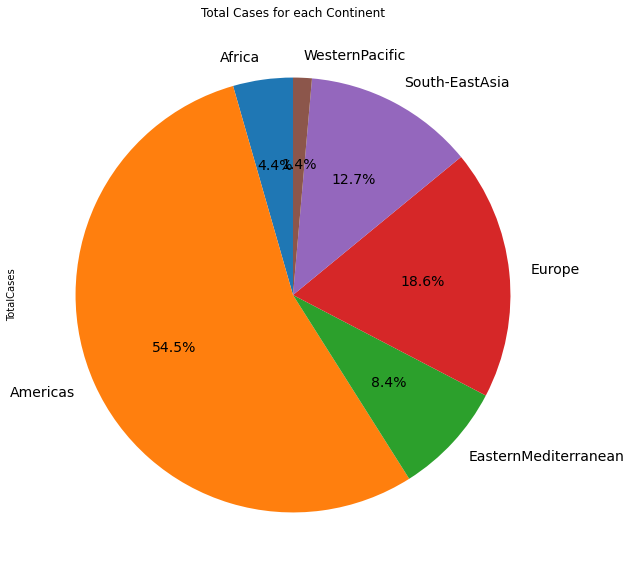

In [34]:
gb_df =  ds[["WHO Region","TotalCases"]]
gb_group_sum =  gb_df.groupby(['WHO Region']).sum().reset_index()

gb_group_sum.plot(kind='pie', y = "TotalCases" , autopct='%1.1f%%',  title = "Total Cases for each Continent",startangle=90,
 shadow=False, labels=gb_group_sum['WHO Region'], legend = False, fontsize=14, figsize=(10, 10))